# Basic Chemostat Model

#TODO add schematic of chemostat model
#from IPython.display import Image
#Image(filename=('NPZDslab_schematics.png'), width=500)

In [1]:
import numpy as np
# to check for array handling errors:
#np.warnings.filterwarnings('error', category=np.VisibleDeprecationWarning)

import matplotlib.pyplot as plt

In [2]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '../src/'))

import phydra

In [3]:
import xso

In [4]:
from phydra.components.fluxes.growth_multi_lim import Growth_ML, Eppley_ML, Monod_ML, Smith_ML


fifth
fourth
fourth
fourth
fourth
fifth
fourth
fourth
fourth


In [5]:
from phydra.components.variables import SV

second
second
second


In [6]:
from phydra.components.variables import SV

In [7]:
from phydra.components.variables import SV

from phydra.components.fluxes.basic import LinearDecay, LinearExchange, LinearDecay_ListInput
from phydra.components.fluxes.basic_forcing import LinearForcingInput
from phydra.components.fluxes.growth import MonodGrowth

from phydra.components.forcings import ConstantForcing, SinusoidalForcing

fourth
fourth
fourth
fourth
fourth
fourth
fourth
fourth
fourth
fourth
fourth
third
third
third
third
third
third
third


In [8]:
NPChemostat = xso.create({
    # State variables
    'Nutrient':SV,
    'Phytoplankton':SV,
    
    # Flows:
    'Inflow':LinearForcingInput,
    'Outflow':LinearDecay_ListInput,

    # Growth
    'Growth':MonodGrowth,
    
    # Mortality 
    #'PhytoLinMortality':LinearDecay,
    #'PhytoExcretion':LinearExchange,

    # Forcings
    'N0':ConstantForcing
                     })

In [9]:
NPChemostat

<xsimlab.Model (9 processes, 16 inputs)>
Core
    solver_type       [in] solver type to use for model
Time
    time              [in] ('input_time',) sequence of time points ...
Nutrient
    var_label         [in] label / basic state variable
    var_init          [in] initial value / basic state variable
Phytoplankton
    var_label         [in] label / basic state variable
    var_init          [in] initial value / basic state variable
N0
    forcing_label     [in] label / 
    value             [in] constant value of forcing
Inflow
    var               [in] label reference / variable affected by flux
    forcing           [in] label reference / forcing affecting flux
    rate              [in] linear rate of change
Outflow
    var_list          [in] ('decay_vars',) label reference / list o...
    rate              [in] linear rate of decay/mortality
Growth
    resource          [in] label reference / 
    consumer          [in] label reference / 
    halfsat           [in] half-satu

In [10]:
#NPChemostat.visualize(show_inputs=True)

In [11]:
chemostat_setup = xso.setup(solver='stepwise', model=NPChemostat,
            time=np.arange(0,100),
            input_vars={
                    # State variables
                    'Nutrient':{'var_label':'N','var_init':1.},
                    'Phytoplankton':{'var_label':'P','var_init':0.01},
                
                    # Flows:
                    'Inflow':{'forcing':'N0', 'rate':0.1, 'var':'N'},
                    'Outflow':{'var_list':['N', 'P'], 'rate':0.1},
                
                    # Growth
                    'Growth':{'resource':'N', 'consumer':'P', 'halfsat':0.7},
                
                    # Mortality 
                    #'PhytoLinMortality':{'var':'P', 'rate':0.05},
                    #'PhytoExcretion':{'source':'P', 'sink':'N', 'rate':0.05},

                    # Forcings
                    'N0':{'forcing_label':'N0', 'value':1.}
            })

In [12]:
chemostat_setup_wbatchdim = xso.setup(solver='stepwise', model=NPChemostat,
            time=np.arange(0,100),
            input_vars={
                    # State variables
                    'Nutrient':{'var_label':'N','var_init':1.},
                    'Phytoplankton':{'var_label':'P','var_init':0.01},
                
                    # Flows:
                    'Inflow':{'forcing':'N0', 'rate':0.1, 'var':'N'},
                    'Outflow':{'var_list':['N', 'P'], 'rate':0.1},
                
                    # Growth
                    'Growth':{'resource':'N', 'consumer':'P', 'halfsat':("hello",[0.7, 0.6, 0.5])},
                
                    # Mortality 
                    #'PhytoLinMortality':{'var':'P', 'rate':0.05},
                    #'PhytoExcretion':{'source':'P', 'sink':'N', 'rate':0.05},

                    # Forcings
                    'N0':{'forcing_label':'N0', 'value':1.}
            })

In [13]:
chemostat_setup.reset_coords()

<xarray.Dataset>
Dimensions:                   (clock: 100, decay_vars: 2, input_time: 100)
Coordinates:
  * clock                     (clock) int64 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
Dimensions without coordinates: decay_vars, input_time
Data variables: (12/16)
    Nutrient__var_label       <U1 'N'
    Nutrient__var_init        float64 1.0
    Phytoplankton__var_label  <U1 'P'
    Phytoplankton__var_init   float64 0.01
    Inflow__forcing           <U2 'N0'
    Inflow__rate              float64 0.1
    ...                        ...
    Growth__consumer          <U1 'P'
    Growth__halfsat           float64 0.7
    N0__forcing_label         <U2 'N0'
    N0__value                 float64 1.0
    Core__solver_type         <U8 'stepwise'
    Time__time                (input_time) int64 0 1 2 3 4 5 ... 95 96 97 98 99
Attributes:
    __xsimlab_output_vars__:  Nutrient__var_value,Phytoplankton__var_value,In...

In [14]:
import zarr

In [15]:
with NPChemostat:
    chemostat_out = chemostat_setup.xsimlab.run()#batch_dim="hello", parallel=True)

In [16]:
chemostat_out.Phytoplankton__var_value

<xarray.DataArray 'Phytoplankton__var_value' (time: 100)>
array([0.01      , 0.01488235, 0.02212717, 0.03285462, 0.04868886,
       0.07195104, 0.10588253, 0.15483674, 0.22426112, 0.3200298 ,
       0.44617363, 0.59932596, 0.75864725, 0.87897904, 0.9229583 ,
       0.9246121 , 0.92425785, 0.92406251, 0.92387795, 0.92371245,
       0.92356345, 0.92342935, 0.92330865, 0.92320003, 0.92310226,
       0.92301426, 0.92293507, 0.92286379, 0.92279964, 0.9227419 ,
       0.92268994, 0.92264317, 0.92260107, 0.92256319, 0.9225291 ,
       0.92249841, 0.92247079, 0.92244594, 0.92242356, 0.92240343,
       0.92238531, 0.922369  , 0.92235432, 0.92234111, 0.92232923,
       0.92231853, 0.92230889, 0.92230023, 0.92229243, 0.92228541,
       0.92227909, 0.9222734 , 0.92226828, 0.92226368, 0.92225953,
       0.9222558 , 0.92225244, 0.92224942, 0.9222467 , 0.92224425,
       0.92224205, 0.92224007, 0.92223828, 0.92223668, 0.92223523,
       0.92223393, 0.92223276, 0.92223171, 0.92223076, 0.9222299 ,
       0.92222914, 0.92222844, 0.92222782, 0.92222726, 0.92222676,
       0.9222263 , 0.9222259 , 0.92222553, 0.9222252 , 0.9222249 ,
       0.92222463, 0.92222439, 0.92222417, 0.92222398, 0.9222238 ,
       0.92222365, 0.9222235 , 0.92222338, 0.92222326, 0.92222316,
       0.92222306, 0.92222298, 0.9222229 , 0.92222283, 0.92222277,
       0.92222272, 0.92222267, 0.92222262, 0.92222258, 0.92222255])
Dimensions without coordinates: time
Attributes:
    Phydra_store_out:  True
    description:       output of variable value / basic state variable

(0.0, 1.0495)

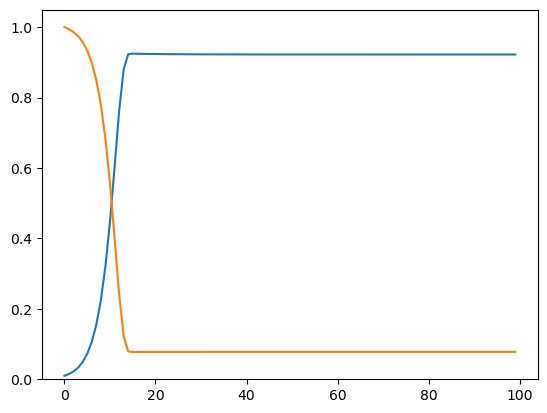

In [17]:
time = chemostat_out.Time__time
plt.plot(time, chemostat_out.Phytoplankton__var_value)
plt.plot(time, chemostat_out.Nutrient__var_value)
plt.ylim(bottom=0)

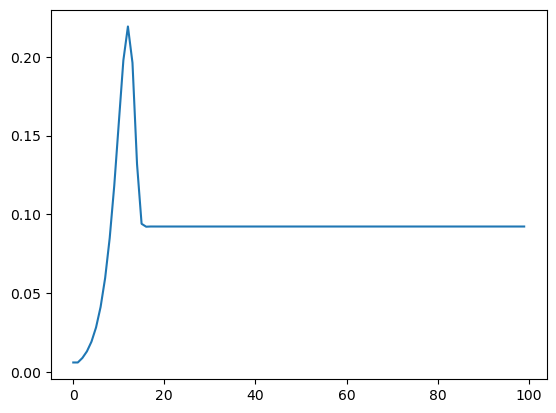

In [18]:
plt.plot(time, chemostat_out.Growth__uptake_value)

In [19]:
## now add sinusoidal forcing:
NPChemostat_sinu = NPChemostat.update_processes({'N0':SinusoidalForcing})

with NPChemostat_sinu:
    chemostat_setup_sinu = chemostat_setup.xsimlab.update_vars(input_vars={'N0':{'forcing_label':'N0', 'period':24}})
    chemostat_out_sinu = chemostat_setup_sinu.xsimlab.run()

(0.0, 1.3634692982417211)

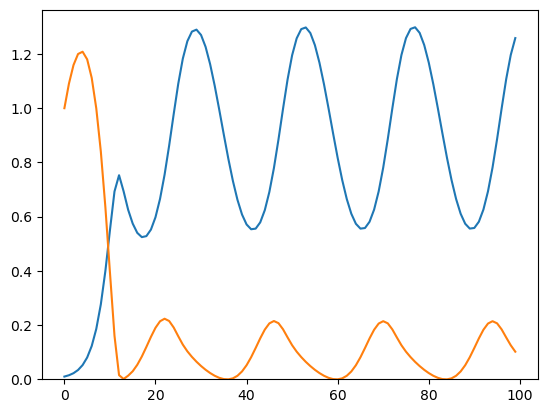

In [20]:
time = chemostat_out.Time__time
plt.plot(time, chemostat_out_sinu.Phytoplankton__var_value)
plt.plot(time, chemostat_out_sinu.Nutrient__var_value)
plt.ylim(bottom=0)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

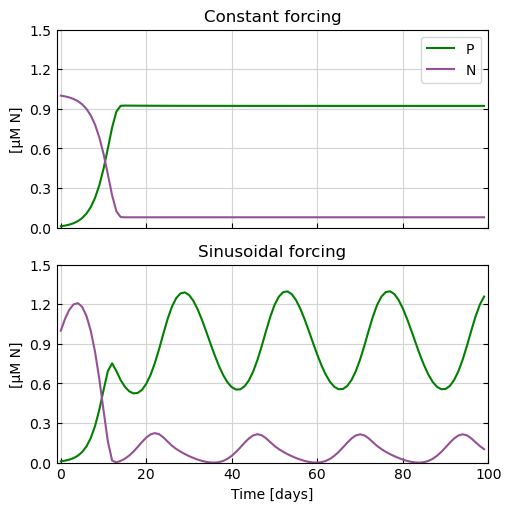

In [21]:
# Pub Plot Draft
%matplotlib inline


culr=['#955196','green','darkorange','brown']

plt.rcParams['figure.figsize'] = [5, 5]

numcols = 1
f1, ax1 = plt.subplots(2, numcols, sharex='col', constrained_layout=True)  #, sharey='row')

plt.setp((ax1, ))  # , xticks=[1,60,120,180,240,300,365]
from matplotlib.ticker import MaxNLocator
for axe in (ax1,):
    for i in range(2):
        
        axe[i].grid(True, color='lightgrey')
        axe[i].get_yaxis().set_major_locator(MaxNLocator(nbins=5))
        axe[i].tick_params(top=False, right=True, direction="in")

time = chemostat_out.Time__time
ax1[0].set_title('Constant forcing')
#ax1[0].annotate('Monod',xy=(0, 0.6),rotation=90,xytext=(-30,.75), size='x-large', verticalalignment='center')
ax1[0].plot(time, chemostat_out.Phytoplankton__var_value, label='P', c=culr[1])
ax1[0].plot(time, chemostat_out.Nutrient__var_value, label='N', c=culr[0])
ax1[0].set_ylabel('[µM N]')

time = chemostat_out_sinu.Time__time
ax1[1].set_title('Sinusoidal forcing')
ax1[1].plot(time, chemostat_out_sinu.Phytoplankton__var_value, label='P', c=culr[1])
ax1[1].plot(time, chemostat_out_sinu.Nutrient__var_value, label='N', c=culr[0])


ax1[0].set_ylabel('[µM N]')
ax1[1].set_ylabel('[µM N]')

ax1[1].set_xlabel('Time [days]')


# Defining custom 'xlim' and 'ylim' values.
xlim = (-1, 100)

# Setting the values for all axes.
plt.setp((ax1,), xlim=xlim, ylim=(0,1.5))

f1.align_ylabels()

for axe in (ax1,):
    for i in range(1):
        axe[i].legend()#fontsize='small')

#ax1[1].set_yticklabels([])
#ax2[1].set_yticklabels([])
        
#plt.tight_layout()

#plt.subplots_adjust(hspace=0.1, wspace=0.1)

#plt.savefig('NP_Chemostat.pdf', bbox_inches='tight')
plt.show()